<a href="https://colab.research.google.com/github/Anshusidda99/fmml/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

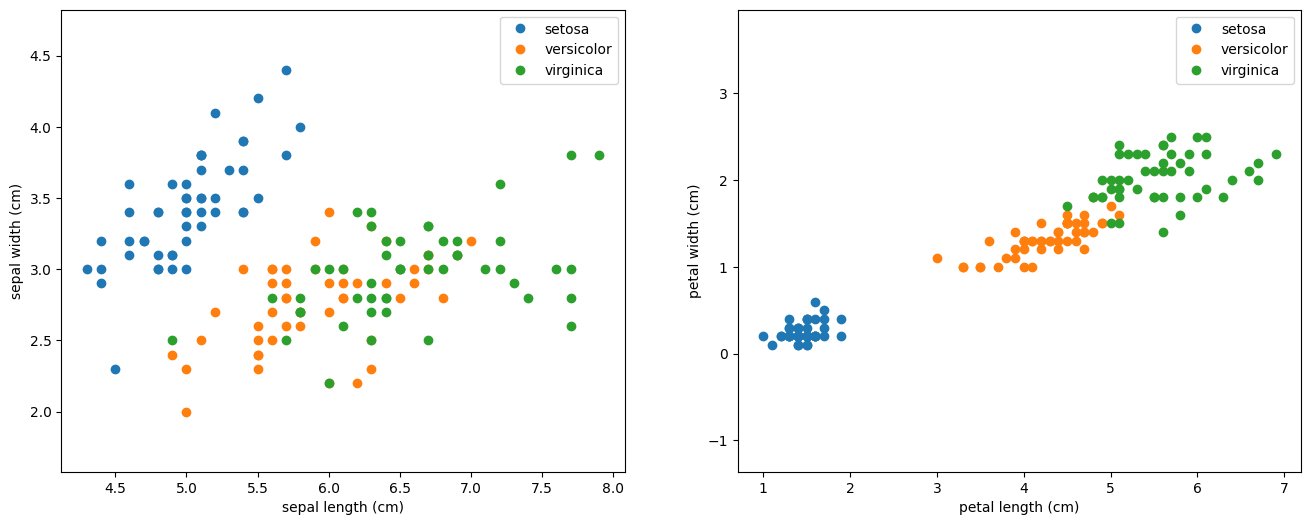

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 305.78it/s]


# Plot training progress

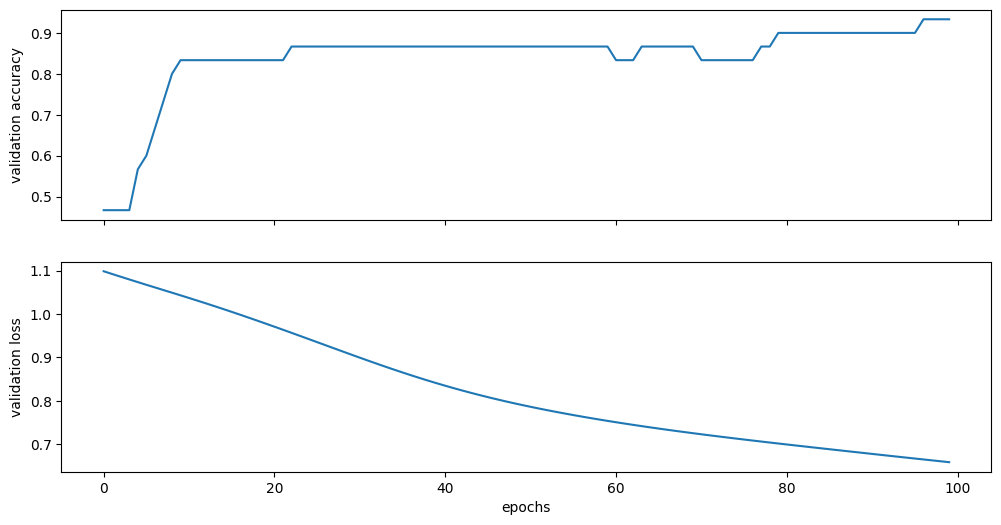

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

ANSWERS:

1. Changing the number of hidden layers in a neural network can significantly impact its performance and ability to learn complex patterns in data. Adding more hidden layers can potentially enable the network to capture more intricate relationships within the data, leading to better performance, but it also increases the risk of overfitting, where the model memorizes the training data rather than learning generalizable patterns.

On the other hand, reducing the number of hidden layers may simplify the model and reduce the risk of overfitting, but it may also limit the model's capacity to learn complex patterns.

When deciding how many hidden layers to use, it's essential to consider factors such as the complexity of the problem, the amount of available data, computational resources, and the desired trade-off between model complexity and generalization performance.

Experimenting with different configurations, including varying the number of hidden layers, is a crucial part of the machine learning process to find the optimal architecture for a specific task. Cross-validation techniques can help assess the performance of different architectures and determine which one works best for the given problem.

2. Adjusting the number of neurons in the hidden layer(s) of a neural network is another way to modify its architecture and potentially improve its performance.

Increasing the number of neurons in a hidden layer can allow the network to capture more complex patterns in the data. This increased capacity may lead to better performance, especially for tasks with intricate relationships between input and output variables. However, it also comes with the risk of overfitting, particularly if the model becomes too complex relative to the amount of available training data.

Conversely, decreasing the number of neurons in a hidden layer can simplify the model, potentially reducing the risk of overfitting and making the training process faster. However, this reduction in capacity may also limit the model's ability to learn complex patterns in the data, potentially leading to poorer performance.

As with changing the number of hidden layers, determining the optimal number of neurons in a hidden layer requires experimentation and evaluation using techniques like cross-validation. It's essential to strike a balance between model complexity and generalization performance, taking into account the specific characteristics of the dataset and the problem being addressed.

3. Certainly! Activation functions play a crucial role in neural networks by introducing non-linearities, enabling the network to learn complex patterns in the data. There are several activation functions to choose from, each with its characteristics. Let's explore a few common ones:

1. **ReLU (Rectified Linear Unit)**: ReLU is one of the most widely used activation functions. It outputs the input directly if it is positive, and zero otherwise. Mathematically, it's defined as \( f(x) = \max(0, x) \). ReLU is computationally efficient and helps mitigate the vanishing gradient problem. However, ReLU can suffer from the "dying ReLU" problem, where neurons may become inactive and stop learning if they consistently output zero.

2. **Sigmoid**: Sigmoid squashes the input values to the range [0, 1]. It's given by the formula \( f(x) = \frac{1}{1 + e^{-x}} \). Sigmoid is useful for binary classification tasks as it produces probabilities that can be interpreted as class probabilities. However, it tends to saturate and cause the vanishing gradient problem during training, especially for deep networks.

3. **Tanh (Hyperbolic Tangent)**: Tanh is similar to the sigmoid function but squashes the input values to the range [-1, 1]. It's defined as \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \). Tanh addresses the issue of the sigmoid function's output being centered around zero, which can speed up convergence in some cases.

4. **Leaky ReLU**: Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient when the input is negative. It's defined as \( f(x) = \max(\alpha x, x) \), where \( \alpha \) is a small constant (usually around 0.01). Leaky ReLU helps mitigate the dying ReLU problem by allowing gradients to flow through neurons, even when they're inactive.

5. **Softmax**: Softmax is often used in the output layer of classification neural networks to produce a probability distribution over multiple classes. It exponentiates the input values and normalizes them to sum up to 1. Softmax is defined as \( f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}} \), where \( N \) is the number of classes.

Experimenting with different activation functions can significantly impact the performance of your neural network. It's often a matter of trial and error to find the activation function that works best for your specific dataset and task.